# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

For this assignment, you will use reinforcement learning to solve the [Towers of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) puzzle.  

To accomplish this, you must modify the code discussed in lecture for learning to play Tic-Tac-Toe.  Modify the code  so that it learns to solve the three-disk, three-peg
Towers of Hanoi Puzzle.  In some ways, this will be simpler than the
Tic-Tac-Toe code.  

Steps required to do this include the following:

  - Represent the state, and use it as a tuple as a key to the Q dictionary.
  - Make sure only valid moves are tried from each state.
  - Assign reinforcement of $1$ to each move, even for the move that results in the goal state.

Make a plot of the number of steps required to reach the goal for each
trial.  Each trial starts from the same initial state.  Decay epsilon
as in the Tic-Tac-Toe code.

## Requirements

First, how should we represent the state of this puzzle?  We need to keep track of which disks are on which pegs. Name the disks 1, 2, and 3, with 1 being the smallest disk and 3 being the largest. The set of disks on a peg can be represented as a list of integers.  Then the state can be a list of three lists.

For example, the starting state with all disks being on the left peg would be `[[1, 2, 3], [], []]`.  After moving disk 1 to peg 2, we have `[[2, 3], [1], []]`.

To represent that move we just made, we can use a list of two peg numbers, like `[1, 2]`, representing a move of the top disk on peg 1 to peg 2.

Now on to some functions. Define at least the following functions. Examples showing required output appear below.

   - `printState(state)`: prints the state in the form shown below
   - `validMoves(state)`: returns list of moves that are valid from `state`
   - `makeMove(state, move)`: returns new (copy of) state after move has been applied.
   - `trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF)`: train the Q function for number of repetitions, decaying epsilon at start of each repetition. Returns Q and list or array of number of steps to reach goal for each repetition.
   - `testQ(Q, maxSteps, validMovesF, makeMoveF)`: without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

A function that you might choose to implement is

   - `stateMoveTuple(state, move)`: returns tuple of state and move.  
    
This is useful for converting state and move to a key to be used for the Q dictionary.

Show the code and results for testing each function.  Then experiment with various values of `nRepetitions`, `learningRate`, and `epsilonDecayFactor` to find values that work reasonably well, meaning that eventually the minimum solution path of seven steps is found consistently.

Make a plot of the number of steps in the solution path versus number of repetitions. The plot should clearly show the number of steps in the solution path eventually reaching the minimum of seven steps, though the decrease will not be monotonic.  Also plot a horizontal, dashed line at 7 to show the optimal path length.

Add markdown cells in which you describe the Q learning algorithm and your implementation of Q learning as applied to the Towers of Hanoi problem.  Use at least 15 sentences, in one or more markdown cells.

# Examples

In [2]:
import copy as cp
import numpy as np
import random

In [3]:
def printState(state):
    state = cp.deepcopy(state)
    for i in range(0,3):
        if len(state[i]) == 2:
            state[i].insert(0, " ")
        if len(state[i]) == 1:
            state[i].insert(0, " ")
            state[i].insert(0, " ")
        if len(state[i]) == 0:
            state[i].insert(0, " ")
            state[i].insert(0, " ")
            state[i].insert(0, " ")
    
    for i in range(0,3):
        print(state[0][i], end = " ")
        print(state[1][i], end = " ")
        print(state[2][i], end = " ")
        print("")
    print("------")
    
    

In [4]:
state = [[1, 2, 3], [], []]
printState(state)

1     
2     
3     
------


In [5]:
def stateMoveTuple(state, move):
    state = cp.deepcopy(state)
    for i in range(0,3):
        state[i] = tuple(state[i])
    return (tuple(state), tuple(move))

In [6]:
move =[1, 3]

s = stateMoveTuple(state, move)
s

(((1, 2, 3), (), ()), (1, 3))

In [7]:
state

[[1, 2, 3], [], []]

In [8]:
def validMoves(state):
    results = []
    for i in range(0,3):
        for j in range(0,3):
            if i != j:
                if len(state[i]) != 0: 
                    if len(state[j]) == 0: 
                        results.append([i+1,j+1])
                    elif state[j][0] > state[i][0]: 
                        results.append([i+1,j+1])
    return results

In [9]:
printState(state)
validMoves(state)

1     
2     
3     
------


[[1, 2], [1, 3]]

In [10]:
def makeMove(state, move):
    state = cp.deepcopy(state)
    state[move[1]-1].insert(0,state[move[0]-1].pop(0))
    return state

In [11]:
newstate = makeMove(state, move)
newstate

[[2, 3], [], [1]]

In [12]:
printState(newstate)

      
2     
3   1 
------


In [13]:
def epsilonGreedy(epsilon, Q, state, validMovesF):
    #print("in epsilon")
    validMoves = validMovesF(state)
    if np.random.uniform() < epsilon:
        # Random Move
        return random.choice(validMoves)
    else:
        # Greedy Move
        #print("greedy")
        
        for move in validMoves:
            if stateMoveTuple(state, move) not in Q:
                return move
        
        Qs = np.array([Q.get(stateMoveTuple(state, move), np.inf) for move in validMoves]) 
        
        
        
        return validMoves[ np.argmin(Qs) ]
    



In [14]:
a = np.array([[0, 5, 2],
       [3, 4, 5]])
np.argmax(a)

1

In [15]:
Q = {}

Q[stateMoveTuple(state, [1,2])] = 1

epsilonGreedy(.5, Q, state, validMoves)

[1, 3]

In [16]:
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF):
    
    goalState = [[], [], [1,2,3]]
    epsilon = 1.0
    Q = {}
    stepsToGoal = np.zeros(nRepetitions)
    
    for game in range(nRepetitions):
        
        epsilon *= epsilonDecayFactor
        
        step = 0
        
        state = [[1, 2, 3], [], []]
        
        done = False
        
        
        
        while not done:
            step +=1
            
            move = epsilonGreedy(epsilon, Q, state, validMovesF)
            
            newState = cp.deepcopy(state)
            
            newState = makeMoveF(newState, move)
            
            tupleSM = stateMoveTuple(state, move)
            
            if tupleSM not in Q:
                Q[tupleSM] = 1
            
            if newState == goalState:
                Q[tupleSM] = 0
                done = True
            
            
            
            
            if step > 1:
                
                TSM_old = stateMoveTuple(stateOld,moveOld)
                Q[TSM_old] += learningRate * (1 + Q[tupleSM] - Q[TSM_old])
                #print(str(Q[tupleSM]) + " " + str(Q[TSM_old]))
            stateOld, moveOld = state, move
            state = newState
            
            if step%10000 == 0:
                print(str(step) + " " + str(state) + " " + str(move))
            
        stepsToGoal[game] = step
        #print(str(game) + str(move))
    
    
    return Q, stepsToGoal
    

In [23]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)

In [24]:
stepsToGoal

array([94., 38., 96., 98., 19.,  9., 11., 22., 11.,  7.,  9., 21., 19.,
        9., 13.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.])

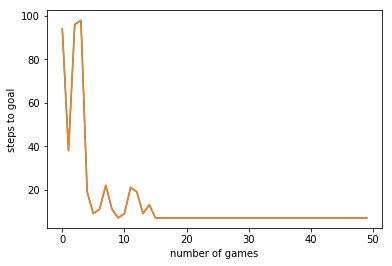

In [38]:
import matplotlib.pyplot as plt

plt.plot(stepsToGoal)
plt.ylabel("steps to goal")
plt.xlabel("number of games")
plt.show()


In [74]:
def testQ(Q, maxSteps, validMovesF, makeMoveF):
    result = []
    state = [[1,2,3],[],[]]
    goalState = [[],[],[1,2,3]]
    result.append(state)
    for i in range(0,maxSteps):
        move = epsilonGreedy(0,Q,state,validMovesF)
        state = makeMoveF(state,move)
        result.append(state)
        if state == goalState: return result
    return result 
    

In [33]:
path = testQ(Q, 20, validMoves, makeMove)path = testQ(Q, 20, validMoves, makeMove)

In [34]:
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [35]:
for s in path:
    printState(s)
    print()

1     
2     
3     
------

      
2     
3   1 
------

      
      
3 2 1 
------

      
  1   
3 2   
------

      
  1   
  2 3 
------

      
      
1 2 3 
------

      
    2 
1   3 
------

    1 
    2 
    3 
------



## Grading

Download and extract `A4grader.py` from [A4grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A4grader.tar).

In [32]:
%run -i A4grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Darcy-A4.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing validMoves([[1], [2], [3]])

--- 10/10 points. Correctly returned [[1, 2], [1, 3], [2, 3]]

Testing validMoves([[], [], [1, 2, 3]])

--- 10/10 points. Correctly returned [[3, 1], [3, 2]]

Testing makeMove([[], [], [1, 2, 3]], [3, 2])

--- 10/10 points. Correctly returned [[], [1], [2, 3]]

Testing makeMove([[2], [3], [1]], [1, 2])

--- 10/10 points. Correctly returned [[], [2, 3], [1]]

Testing   Q, steps = trainQ(1000, 0.5, 0.7, validMoves, makeMove).

--- 10/10 points. Q dictionary has correct number of entries.

--- 10/10 points. The mean of the number of steps of 7.411 is correctly < 10.

Testing   path = testQ(Q, 20, validMoves, makeMove).

--- 20/20 points. Correctly returns path of length 8, which is correctly less than 10.

cs440 Execu

## Extra Credit

Modify your code to solve the Towers of Hanoi puzzle with 4 disks instead of 3.  Name your functions

    - printState_4disk
    - validMoves_4disk
    - makeMove_4disk

Find values for number of repetitions, learning rate, and epsilon decay factor for which trainQ learns a Q function that testQ can use to find the shortest solution path.  Include the output from the successful calls to trainQ and testQ.